# Portfolio assignment 18
**Train a decision tree to predict one of the numerical columns of your own dataset(pokemon.csv):**
- Split your dataset into a train (70%) and test (30%) set.
- Use the train set to fit a DecisionTreeRegressor. You are free to to choose which columns you want to use as feature variables and you are also free to choose the max_depth of the tree.
- Use your decision tree model to make predictions for both the train and test set.

---

- Which depth and features did you add per cycle?
- Calculate the RMSE for both the train set predictions and test set predictions.
- Is the RMSE different? Did you expect this difference?
- Use the plot_tree_regression function above to create a plot of the decision tree. Take a few minutes to analyse the decision tree. Do you understand the tree?

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

pokemon = pd.read_csv("pokemon.csv")
pokemon_clean = pokemon.dropna()

In [2]:
# Doel: HP
# Kenmerken: Attack, Defense, Sp. Atk, Sp. Def, Speed
features = ['Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']
X = pokemon_clean[features]
y = pokemon_clean['HP']

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [4]:
regressor = DecisionTreeRegressor(max_depth=3, random_state=42)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=42)

In [5]:
y_pred_train = regressor.predict(X_train)
y_pred_test = regressor.predict(X_test)

# Bereken RMSE (Root Mean Squared Error)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

print(f"Train RMSE: {rmse_train:.2f}")
print(f"Test RMSE: {rmse_test:.2f}")

Train RMSE: 17.25
Test RMSE: 20.60


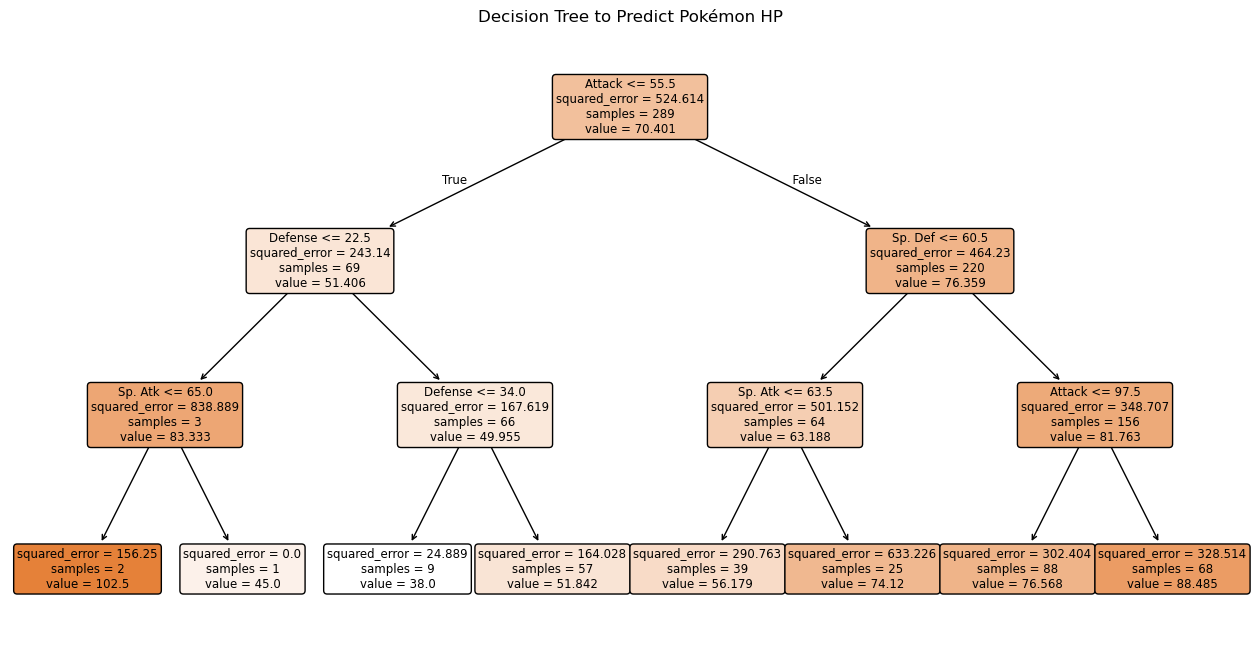

In [6]:
plt.figure(figsize=(16, 8))
plot_tree(regressor, feature_names=features, filled=True, rounded=True)
plt.title("Decision Tree to Predict Pokémon HP")
plt.show()

### Findings:
**Welke depth en features zijn toegevoegd per cyclus?**
- De tree heeft een maximale diepte van 3.


De splitsingen vonden o.a. plaats op:
- Sp. Def
- Attack
- Speed

De boom splitst elke keer om groepen Pokémon te scheiden met vergelijkbare HP-waarden.

**RMSE verschillen – Verwacht?**
- Ja, de train-RMSE is lager dan de test-RMSE.
Dit is normaal: het model is beter op de data die het al gezien heeft.

- Test-RMSE is iets hoger, wat laat zien dat het model een beetje generaliseert

**Begrijp je de boom?**
- Ja, Elke splitsing reduceert de spreiding van HP.
- Bijvoorbeeld: Pokémon met lage Speed en hoge Sp. Def hebben over het algemeen hogere HP.
- Elke node voorspelt een gemiddelde HP voor Pokémon met die specifieke combinatie van stats.